In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

#ignore warning messages to keep the EDL notebook clean
import warnings
warnings.filterwarnings('ignore')

#loading the data and storing in a dataframe
df=pd.read_csv('C:/Users/Aishwarya/OneDrive/Desktop/edges.csv')
df.head()

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96104 entries, 0 to 96103
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hero    96104 non-null  object
 1   comic   96104 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [13]:
#Data cleaning

#checking for missing values
print(df.isnull().sum())

#handling missing values if any
df.dropna(inplace=True)

#removing duplicates
df.drop_duplicates(inplace=True)

hero     0
comic    0
dtype: int64


In [17]:
#Exploratory Data Analysis

# Basic summary stats
print(df.describe())

                           hero  comic
count                     96104  96104
unique                     6439  12651
top     SPIDER-MAN/PETER PARKER  COC 1
freq                       1577    111


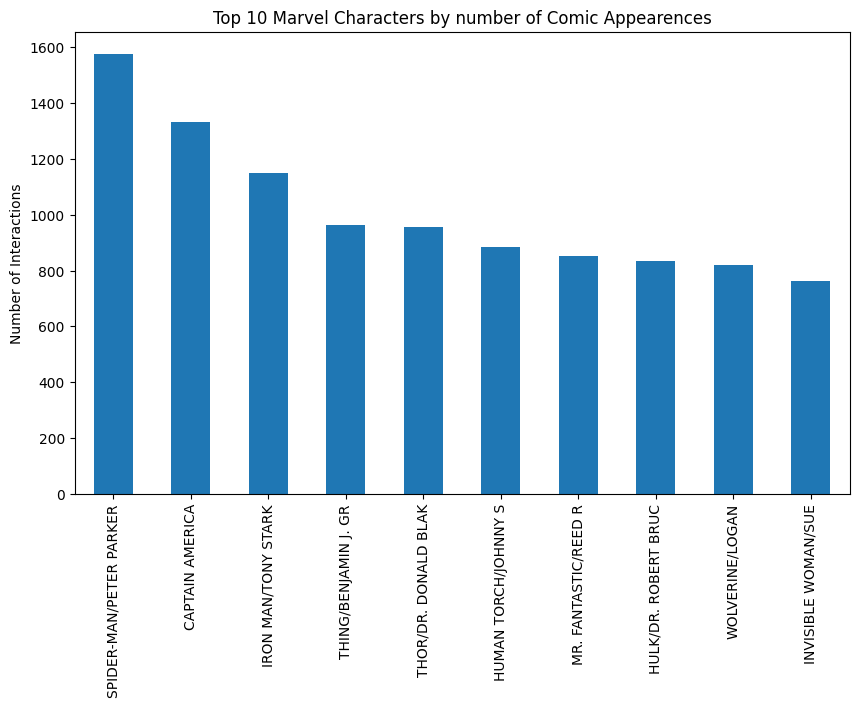

In [22]:
#Distribution of Interations(connections between characters)

#Counting the number of interactions per character
character_interactions = pd.concat([df['hero'],df['comic']]).value_counts()

#Plotting the top 10 character with most interactions
plt.figure(figsize=(10,6))
character_interactions.head(10).plot(kind='bar')
plt.title('Top 10 Marvel Characters by number of Comic Appearences')
plt.ylabel('Number of Interactions')
plt.show()

In [29]:
#Network Analysis
from pyvis.network import Network

#creating a graph using networks
G = nx.erdos_renyi_graph(n=100, p=0.05)

# Create a Pyvis Network
net = Network(notebook=True)  # notebook=True if you're using a Jupyter notebook

# Convert NetworkX graph to Pyvis network
net.from_nx(G)

# Customize the network (optional)
net.set_options("""
  var options = {
    "nodes": {
      "size": 20
    },
    "edges": {
      "smooth": {
        "type": "continuous"
      }
    }
  }
""")

for hero in df['hero'].unique():
    net.add_node(hero, label=hero, color='lightgreen', size=20)  # Customizing node properties

for comic in df['comic'].unique():
    net.add_node(comic, label=comic, color='lightblue', size=20) 
# Show the network
net.show("network.html")

network.html


Top 10 characters by Degree Centrality:  [('SPIDER-MAN/PETER PARKER', 0.08261302320708261), ('CAPTAIN AMERICA', 0.06988317879406988), ('IRON MAN/TONY STARK', 0.06024411965006024), ('THING/BENJAMIN J. GR', 0.050447901933050446), ('THOR/DR. DONALD BLAK', 0.05008119859605008), ('HUMAN TORCH/JOHNNY S', 0.04641416522604641), ('MR. FANTASTIC/REED R', 0.044737807114044736), ('HULK/DR. ROBERT BRUC', 0.04374246948504374), ('WOLVERINE/LOGAN', 0.0429042904290429), ('INVISIBLE WOMAN/SUE', 0.039918277542039915)]


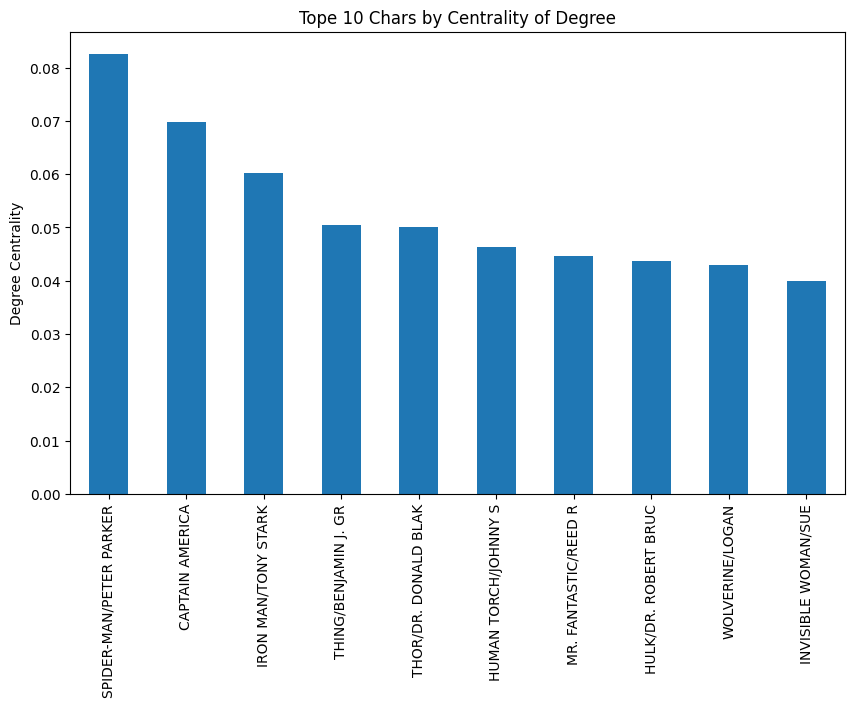

In [28]:

#Centrality Analysis

#Calculting the degree of centrality
degree_centrality= nx.degree_centrality(G)

top_10_deg=sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)[:10]
print("Top 10 characters by Degree Centrality: ", top_10_deg)

#Plotting the result
plt.figure(figsize=(10,6))
pd.Series(dict(top_10_deg)).plot(kind='bar')
plt.title('Tope 10 Chars by Centrality of Degree')
plt.ylabel('Degree Centrality')
plt.show()

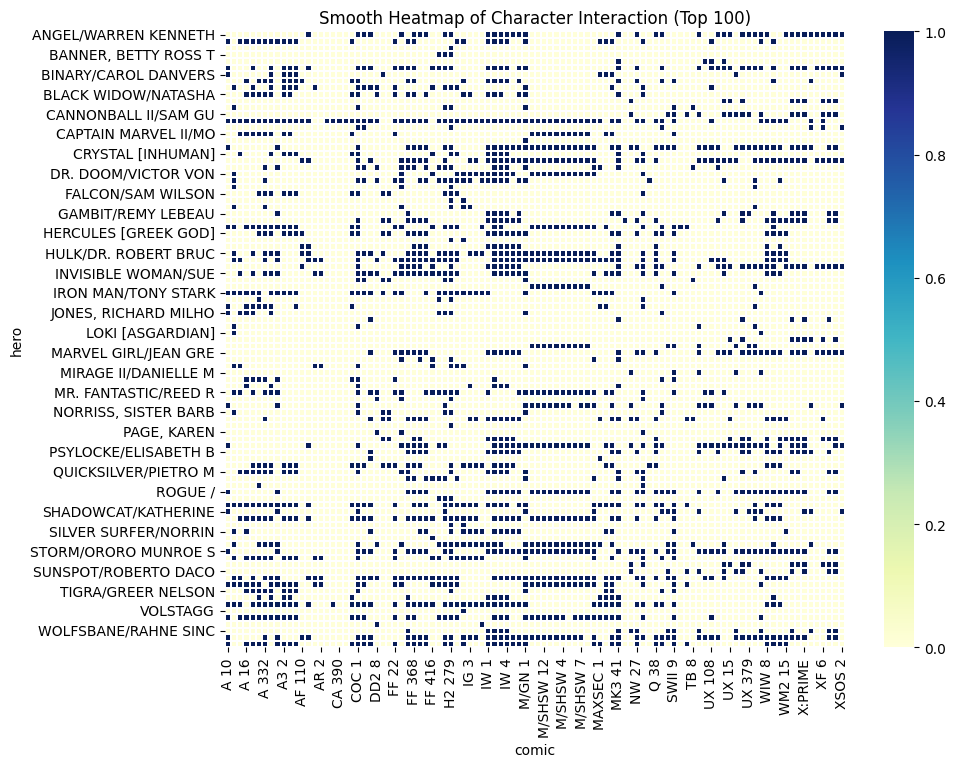

In [46]:
#Visualizing using heatmaps

from scipy.ndimage import gaussian_filter

top_heroes = df['hero'].value_counts().head(100).index
top_comics = df['comic'].value_counts().head(100).index

# Create a smaller interaction matrix
interaction_matrix_small = pd.crosstab(df[df['hero'].isin(top_heroes) & df['comic'].isin(top_comics)]['hero'], 
                                       df[df['hero'].isin(top_heroes) & df['comic'].isin(top_comics)]['comic'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_matrix_small, cmap="YlGnBu", linewidths=0.1)  # Increase linewidth for better separation
plt.title("Smooth Heatmap of Character Interaction (Top 100)")
plt.show()